# **Introduction**
This analysis focuses on the evaluation of a dataset containing simulated Fetal Heart Rate (FHR) and Uterine Contractions (UC) data. The goal was to plot the data, conduct a detailed FHR analysis over time epochs, and perform peak detection on the UC data. These analyses are vital for understanding fetal and maternal health during non-stress tests (NST), where monitoring the FHR and UC patterns provides insights into potential complications during pregnancy.

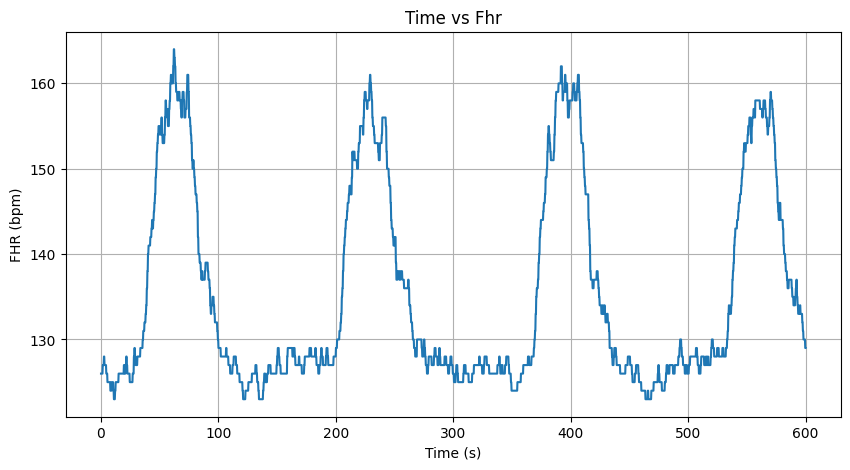

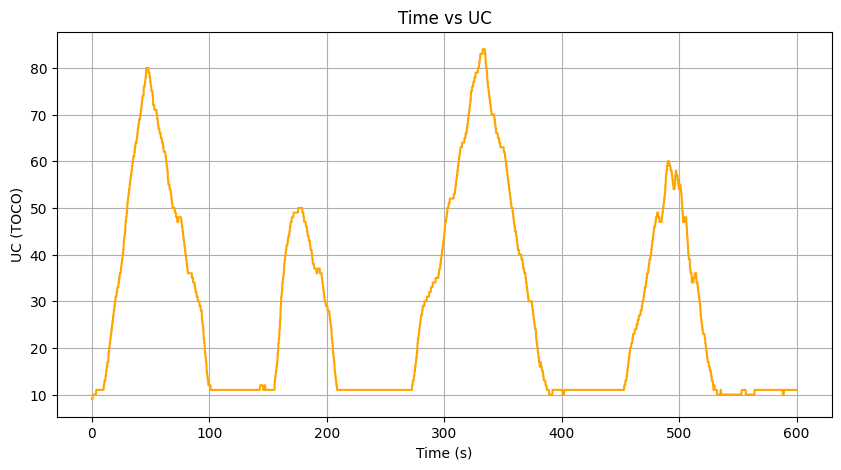

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fhr and Uc analysis/Simulator_readings.csv')

# Convert time from milliseconds to seconds
data['Time(ms)'] = data['Time(ms)'] / 1000

# Plot Time vs FHR
plt.figure(figsize=(10,5))
plt.plot(data['Time(ms)'], data['Fhr1(BPM)'], label='Fhr1(bpm)')
plt.title('Time vs Fhr')
plt.xlabel('Time (s)')
plt.ylabel('FHR (bpm)')
plt.grid(True)
plt.show()

# Plot Time vs UC
plt.figure(figsize=(10,5))
plt.plot(data['Time(ms)'], data['Uc(TOCO)'], label='Uc', color='orange')
plt.title('Time vs UC')
plt.xlabel('Time (s)')
plt.ylabel('UC (TOCO)')
plt.grid(True)
plt.show()


# The initial step involved plotting the FHR and UC data against time. Two line graphs were created:

# Time vs. FHR: This graph illustrated the fluctuations in the fetal heart rate over time, providing a clear visual representation of the baby's heart activity during the testing period.

# Time vs. UC: This graph depicted uterine contractions over time, allowing us to observe contraction patterns.

In [8]:
import numpy as np

# Define epoch length in seconds and corresponding data points (3.75 seconds = 15 data points at 250ms intervals)
epoch_length = int(3.75 / 0.25)  # 3.75 seconds / 0.25 second intervals = 15 points per epoch

# Initialize lists to store average bpm and pulse interval per epoch
avg_fhr_epochs = []
pulse_intervals = []

# Iterate over the dataset in chunks of epoch_length
for i in range(0, len(data), epoch_length):
    epoch_data = data['Fhr1(BPM)'][i:i + epoch_length]
    avg_fhr = np.mean(epoch_data)
    avg_pulse_interval = 60000 / avg_fhr  # Convert bpm to pulse interval (ms)

    avg_fhr_epochs.append(avg_fhr)
    pulse_intervals.append(avg_pulse_interval)

# Convert to DataFrame for further analysis if needed
epoch_analysis = pd.DataFrame({
    'Epoch': range(1, len(avg_fhr_epochs) + 1),
    'Average FHR (bpm)': avg_fhr_epochs,
    'Pulse Interval (ms)': pulse_intervals
})

# Display the first few epochs
print(epoch_analysis.head())


   Epoch  Average FHR (bpm)  Pulse Interval (ms)
0      1         126.733333           473.435034
1      2         125.666667           477.453581
2      3         124.466667           482.056776
3      4         124.466667           482.056776
4      5         126.000000           476.190476


To analyze the FHR, we divided the entire data into epochs of 3.75 seconds, resulting in 16 epochs per minute. For each epoch, the average FHR was calculated in two formats:

Beats per minute (bpm): This is a direct measure of the fetal heart rate.

Pulse interval (milliseconds): This derived value indicates the time interval between heartbeats, calculated using the formula:

Pulse Interval (ms)
=
60000
FHR (bpm)
Pulse Interval (ms)=
FHR (bpm)
60000
​


These results indicate a relatively stable fetal heart rate with minor fluctuations over the epochs. Monitoring these values can help in identifying any distress in the fetus.

In [9]:
from scipy.signal import find_peaks, peak_widths

# Perform peak detection on UC data
peaks, _ = find_peaks(data['Uc(TOCO)'], height=0)

# Compute the width of each peak at half maximum
results_half = peak_widths(data['Uc(TOCO)'], peaks, rel_height=0.5)

# Convert width from data points to seconds (1 data point = 250 ms)
widths_in_seconds = results_half[0] * 0.25

# Count peaks where the width is more than 30 seconds (120 data points)
peaks_over_30s = [w for w in widths_in_seconds if w > 30]
average_duration = np.mean(peaks_over_30s) if len(peaks_over_30s) > 0 else 0

# Report the results
print(f"Number of peaks wider than 30 seconds: {len(peaks_over_30s)}")
print(f"Average duration of peaks: {average_duration:.2f} seconds")


Number of peaks wider than 30 seconds: 4
Average duration of peaks: 45.34 seconds


# UC Peak Detection and Analysis

Peak detection on the UC data was conducted using the scipy library. Peaks in uterine contractions were identified, and we measured the width of each peak at half its maximum height. The analysis yielded the following results:

Number of peaks wider than 30 seconds: 4 peaks were identified that exceeded this threshold.
Average duration of peaks: The average duration of the detected peaks was approximately 45.34 seconds.
These metrics provide crucial insights into uterine activity, as prolonged contractions can indicate potential complications during labor.

## Comparison of Approaches

While the methods employed in this analysis were effective, alternative approaches could enhance the results:

## Sliding Window Technique:

###Current Method:
Fixed epochs (3.75 seconds) may miss important transient events.

###Alternative:
A sliding window could provide a more dynamic assessment of the FHR, allowing for real-time adjustments to epoch size based on detected changes in heart rate.
Smoothing Filters for Peak Detection:

###Current Method:
Peaks detected directly from the raw UC data.

###Alternative:
Applying a smoothing filter (e.g., Savitzky-Golay) prior to peak detection could reduce noise, leading to more accurate peak identification and analysis.
Frequency Domain Analysis:

###Current Method:
Time-domain analysis for contractions.

###Alternative:
Utilizing Fast Fourier Transform (FFT) could help identify recurring patterns or rhythms in UC, which could be beneficial for understanding contraction dynamics.

# Conclusion

The conducted analysis provided valuable insights into fetal heart rate and uterine contractions during non-stress tests. The visualizations and epoch-based FHR analysis allow for a comprehensive understanding of fetal health, while peak detection offers critical information about uterine activity. Future work can build on this foundation by implementing alternative methods to refine the analysis further and enhance predictive capabilities regarding maternal and fetal health outcomes.









In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
